<a href="https://colab.research.google.com/github/ankitrijal2054/CPSMA-441301/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Module 6: Regression

$Ankit Rijal$

$Min Sun Kim$

$Tylar Gifford$

$CPSMA - 441301$

$Dr. Nicolas Jacob$


First, I am going to import the necessary package below. 

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pa

%matplotlib inline

Let's get the raw data using panda function.

In [ ]:
data = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Applied_Stats_Jupyter_Notebooks/master/student.csv')


I checked the data before I import it in here and I found some empty cell in it. So I am going to use fillna function to replace that empty cell with 0 so that it will be easier for us to the calculation.

In [ ]:
data.fillna(0, inplace = True)    #replacing empty cell with 0

Let's look at our data.

In [ ]:
data

,Year,Gender,Smoke,Award,HigherSAT,Exercise,TV,Height,Weight,Siblings,BirthOrder,VerbalSAT,MathSAT,SAT,GPA,Pulse,Piercings
0,Senior,M,No,Olympic,Math,10.0,1.0,71.0,180.0,4,4.0,540,670,1210,3.13,54,0.0
1,Sophomore,F,Yes,Academy,Math,4.0,7.0,66.0,120.0,2,2.0,520,630,1150,2.50,66,3.0
2,FirstYear,M,No,Nobel,Math,14.0,5.0,72.0,208.0,2,1.0,550,560,1110,2.55,130,0.0
3,Junior,M,No,Nobel,Math,3.0,1.0,63.0,110.0,1,1.0,490,630,1120,3.10,78,0.0
4,Sophomore,F,No,Nobel,Verbal,3.0,3.0,65.0,150.0,1,1.0,720,450,1170,2.70,40,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Sophomore,F,Yes,Nobel,Verbal,2.0,0.0,83.0,130.0,1,1.0,550,540,1090,3.44,80,3.0
358,Sophomore,M,Yes,Olympic,Math,8.0,10.0,61.0,180.0,2,1.0,600,620,1220,3.00,74,0.0
359,Sophomore,F,Yes,Nobel,Verbal,1.0,1.0,65.0,150.0,2,2.0,540,450,990,3.27,78,2.0
360,FirstYear,M,Yes,Olympic,Verbal,14.0,5.0,77.0,205.0,2,2.0,550,550,1100,2.30,72,0.0


Looking at our data table, we can see that SAT is related to VerbalSAT and MathSAT, 
$$
i.e. SAT = VerbalSAT + MathSAT
$$

Now, lets use SAT and MathSAT to plot a graph.

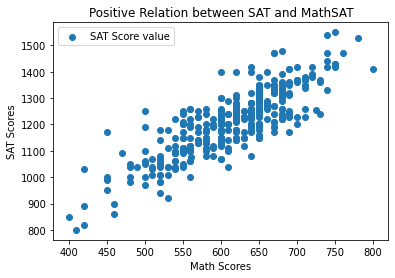

In [ ]:
plt.scatter(data["MathSAT"], data["SAT"], label="SAT Score value")
plt.title("Positive Relation between SAT and MathSAT")
plt.xlabel("Math Scores")
plt.ylabel("SAT Scores")
plt.legend()

In [ ]:
stats.pearsonr(data["MathSAT"],data["SAT"])

(0.8365916602784123, 4.093448362147636e-96)

Looking at what we've just graphed, we see that the relationship shown here is a positive one.

##Linear Regression

The linear regression is used to estimate the relationship between two quantitative variables and uses a straight line. 
It has a form, $\hat y = a_0+a_1 x$ where,

$$
a_1=\frac{\sum x_i y_i -n \bar x \bar y}{\sum x_i^2 - n\bar x ^2}
$$
and
$$
a_0 = \bar y - a_1 \bar x
$$

Now, I am going to define some functions:

In [ ]:
def sum(data_list):
  sum = 0
  for i in data_list:
    sum += i
  return sum

def sum_of_square(data_list1, data_list2):
  sum = 0
  for i in range(len(data_list1)):
    sum = sum + data_list1[i]*data_list2[i]
  return sum

1.   The len() function is returning the total number of objects that is inside of our data. 

2.   We're using sum, a function that has been defined above to obtain our x̅ and ȳ. 
1.   Sum_of_square is used to find xx and xy. Going through the first given list, and for every i in that, using the second list to actually obtain the sum inside of the for loop.

In [ ]:
n = len(data['MathSAT'])
xbar = sum(data['MathSAT'])/n
ybar = sum(data['SAT'])/n
xy = sum_of_square(data['MathSAT'],data['SAT'])
xx = sum_of_square(data['MathSAT'],data['MathSAT'])

slope = (xy-n*xbar*ybar)/(xx-n*xbar**2)
intercept = ybar - slope*xbar

In [ ]:
print("xy = ",xy)

print ("xx = ",xx)

print("x̅ = ",xbar)

print("ȳ = ", ybar)

print ("n = ",n)

xy =  268048133
xx =  136144846
x̅ =  609.4364640883978
ȳ =  1203.6270718232045
n =  362


Above is the output of the variables we set, and below is a visual example of our variable slope.

$$
\frac{268048133-362*609.4364640883978*1203.6270718232045}{136144846-362*609.4364640883978^2} = 1.481473
$$


Here is Intercept.

$$
1203.6270718232045 - 1.481473*609.4364640883978 = 300.763336 
$$

In [ ]:
print(f"slope = {slope}")
print(f"intercept = {intercept}")

slope = 1.4814731127631662
intercept = 300.76333633878824


In [ ]:
def formula(variable,slope, intercept):
  return variable*slope+intercept

Python has a builtin package to do linear regression. Let's check my work using the builtin package.

In [ ]:
regression = stats.linregress(data["MathSAT"],data["SAT"])
regression

LinregressResult(slope=1.4814731127631733, intercept=300.7633363387839, rvalue=0.8365916602784129, pvalue=4.093448362145017e-96, stderr=0.05112960119117141)

Let's pull slope and and intercept from above.

In [ ]:
m = regression[0]
b = regression[1]

print(m)
print(b)

1.4814731127631733
300.7633363387839


Using the above values, we can now calculate y-values for every x using the equation below:

In [ ]:
def y(x):
  return formula(x,m,b)

Now, let's graph the data points and the linear regression together.

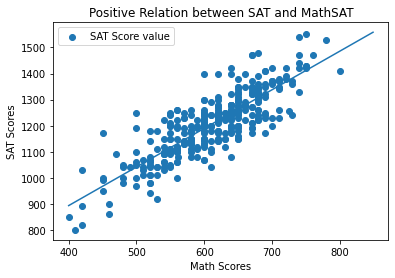

In [ ]:
x = np.arange( 400,850,1)
plt.scatter(data["MathSAT"],data["SAT"], label="SAT Score value")
plt.plot(x,y(x))

plt.title("Positive Relation between SAT and MathSAT")
plt.xlabel("Math Scores")
plt.ylabel("SAT Scores")
plt.legend()

##Nonlinear Regression

The Nonlinear regression is a type of regression in which data is fit to a model and then expressed as a mathematical function and it uses a curved line. 

More than a straight line can be used graphing a nonlinear equation, depending on the mathematical function expressed, compared to the linear regression above. 

Let's take Siblings and BirthOrder data computing linear regression. First lets graph the data to study it's nature.

No handles with labels found to put in legend.


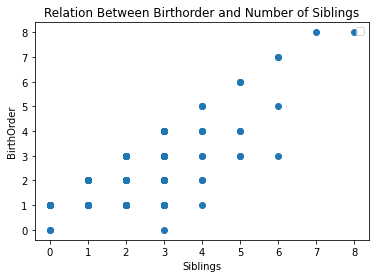

In [ ]:
plt.scatter(data["Siblings"],data["BirthOrder"])
plt.xlabel("Siblings")
plt.ylabel("BirthOrder")
plt.title("Relation Between Birthorder and Number of Siblings")
plt.legend()


Looking at the graph, we can say that there relationship could be a quadratic equation.

Setting our variables of x, xx, xxx and xxxx using the functions that we defined earlier in our project. We will use these these variable to create our final variable in a form of matrix to get quadratic equaion from it.

In [ ]:
x = sum(data['Siblings'])
xx = sum_of_square(data['Siblings'],data['Siblings'])
xxx = sum_of_square(data['Siblings']**2,data['Siblings'])
xxxx = sum_of_square(data['Siblings']**3,data['Siblings'])

#final variable in a form of matrix
matrix = [[n,x,xx,sum(data['BirthOrder'])]
          ,[x,xx,xxx,sum_of_square(data['Siblings'],data['BirthOrder'])]
          ,[xx,xxx,xxxx,sum_of_square(data['Siblings']**2,data['BirthOrder'])]
          ]

Now, I am going to import the Gauss Jordan function from project 4. 

In [ ]:
import math
import numpy as np

def swap(matrix, row1, row2):
  swapped_matrix = []
  size = len(matrix)      #to find the size of a matrix
  for i in range(size):   #using loop to go through each row
    if i == row1:
      swapped_matrix.append(matrix[row2,:])   
    elif i == row2:
      swapped_matrix.append(matrix[row1,:])
    else:
      swapped_matrix.append(matrix[i,:])
  return np.array(swapped_matrix)



def add_rows(matrix, target_row, adding_row, multiplier):
    added_matrix = []
    size = len(matrix)
    for i in range(size):   #using loop to go through each row
      if i == target_row:
        old_row = matrix[target_row,:]
        adding_values = multiplier * matrix[adding_row,:]
        new_row = old_row + adding_values
        added_matrix.append(new_row)
      else:
        added_matrix.append(matrix[i,:])
    return np.array(added_matrix)



def multiply(matrix, target_row, constant):
    new_matrix = []
    size = len(matrix)
    for i in range(size):   #using loop to go through each row
      if i == target_row:
        new_matrix.append(constant * matrix[target_row,:])
      else:
        new_matrix.append(matrix[i,:])
    return np.array(new_matrix)



def max_value_row(matrix, column):
  col = matrix[column:,column]
  max = 0
  for i in range(len(col)):
    if col[max] < col[i]:
      max = i
  max_row = max + column
  return max_row



def gaussJordan(matrix):
    for i in range(len(matrix)):  #using loop to go through each row
      pos = max_value_row(matrix, i)  #using max_value_row function to find the row with largest leftmost value   
      matrix = swap(matrix, pos, i)   #swapping current row with row found on previous step   
      constant = 1/matrix[i,i]        
      matrix = multiply(matrix,i,constant)  #using multiply function to make the diagonal 1
      for column in range(0,i):             
        matrix = add_rows(matrix,column,i,-matrix[column,i])    #using add_rows function to make all values except diagonal 0
      for column in range(i+1,len(matrix)):
        matrix = add_rows(matrix,column,i,-matrix[column,i])    #using add_rows function to make all values except diagonal 0
    return np.array(matrix)

In [ ]:
gaussJordan(np.array(matrix))

array([[ 1.        ,  0.        ,  0.        ,  1.05210048],
       [-0.        ,  1.        ,  0.        ,  0.22811289],
       [ 0.        ,  0.        ,  1.        ,  0.08448391]])

In [ ]:
answer = gaussJordan(np.array(matrix))[:,-1]
answer

array([1.05210048, 0.22811289, 0.08448391])

In [ ]:
def y_value(x):
  y = answer[0] + answer[1]*x + answer[2]*x*x
  return y

No handles with labels found to put in legend.


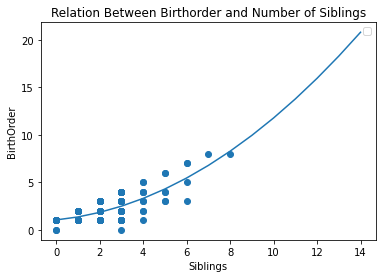

In [ ]:
x = np.arange( 0,15,1)
plt.scatter(data["Siblings"],data["BirthOrder"])
plt.plot(x,y_value(x))

plt.xlabel("Siblings")
plt.ylabel("BirthOrder")
plt.title("Relation Between Birthorder and Number of Siblings")
plt.legend()